# **Title Of Project: Wine Quality Prediction Support Vector Machine**

---



## **Objective: Get Understanding about the wine dataset and build a machine model that prerdicts the quality of wine.**

## **Data Source : (Github)YBIFoundation/Dataset**
**Wine dataset has 12 variables:**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

Source: https://github.com/YBIFoundation/Dataset/raw/f83fe655797d5d59f8c36d3df9fc09bd1fbfe4b4/WhiteWineQuality.csv

## **Import Library**

In [117]:
import pandas as pd

In [118]:
import numpy as np

## **Import Data**

In [119]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/f83fe655797d5d59f8c36d3df9fc09bd1fbfe4b4/WhiteWineQuality.csv', sep=';')

**Displaying first five rows of the dataset**

In [120]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Describe Data**

**Dataset Information**

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Dataset Summary**

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


**Dataset Shape (Row, Column)**

In [123]:
df.shape

(4898, 12)

**Dataset Columns**

In [124]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## **Data Visualization**

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


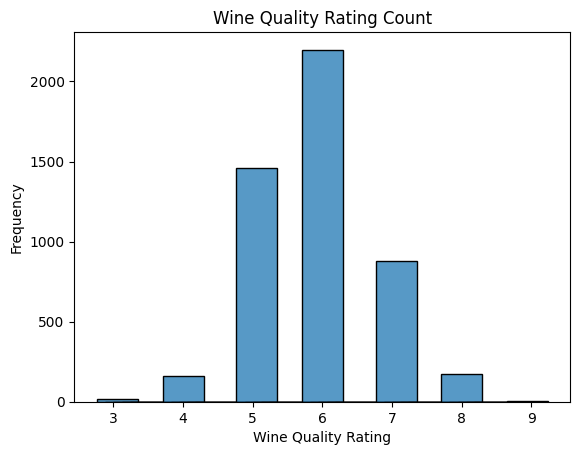

In [127]:
sns.histplot(data=df, x='quality', shrink=5)
plt.title('Wine Quality Rating Count')
plt.ylabel('Frequency')
plt.xlabel('Wine Quality Rating')
plt.show()

In [128]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


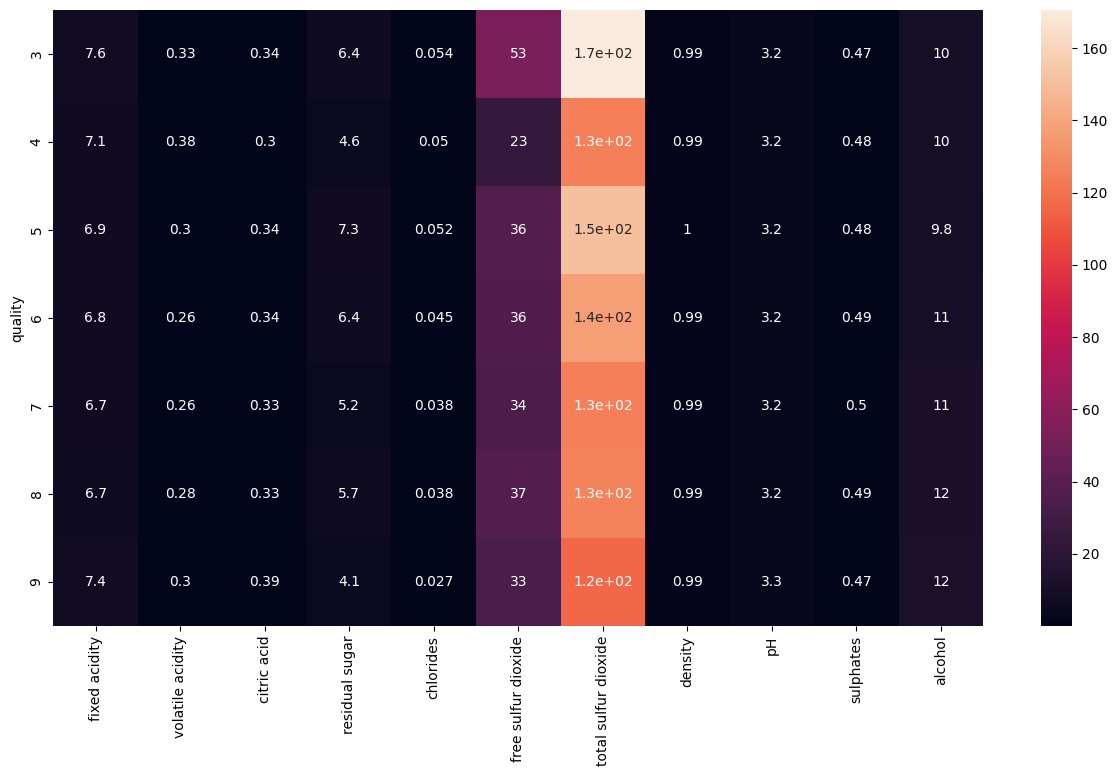

In [129]:
plt.figure(figsize=(15,8))
sns.heatmap(df.groupby('quality').mean(), annot=True)
plt.show()

## **Data Preprocessing**

**Data Cleaning**

Removing Null Values

In [130]:
df.isnull().sum().sum()

0

Removing Nan values

In [131]:
df.isna().sum().sum()

0

Removing Duplicate Values

In [132]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [133]:
new_df = df.drop_duplicates()

In [134]:
new_df.shape

(3961, 12)

**Data Transformation**

*   Converting Wine Quality 3, 4, 5 labelled as 0
*   Converting Wine Quality 6, 7, 8, 9 labelled as 1



In [135]:
new_df['quality'] = new_df['quality'].apply(lambda value: 1 if value>=6 else 0)

<ipython-input-135-6abb61fa6c48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['quality'] = new_df['quality'].apply(lambda value: 1 if value>=6 else 0)


In [136]:
new_df['quality'].value_counts()

,count
quality,
1,2613
0,1348


## **Define Target Variable (y) and Feature Variables (X)**

In [137]:
y = new_df['quality']

In [138]:
y.shape

(3961,)

In [139]:
y

,quality
0,1
1,1
2,1
3,1
6,1
...,...
4893,1
4894,0
4895,1
4896,1


In [140]:
X=new_df.drop(['quality'], axis=1)

In [141]:
X.shape

(3961, 11)

In [142]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


**Get X Variable Standardized**

Next Approach Go for MinMax Scaler

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
ss = StandardScaler()

In [145]:
X = ss.fit_transform(X)

In [146]:
X

array([[ 0.18535197, -0.10188873,  0.20965146, ..., -1.28992816,
        -0.35548818, -1.47039574],
       [-0.6222624 ,  0.18817926,  0.04629365, ...,  0.68992438,
        -0.00309159, -0.89517431],
       [ 1.45446025, -0.0051994 ,  0.53636707, ...,  0.42594404,
        -0.44358733, -0.40212736],
       ...,
       [-0.39151544, -0.39195672, -1.17888992, ..., -1.35592325,
        -0.26738904, -0.9773488 ],
       [-1.54525024,  0.09148993, -0.28042197, ...,  0.95390472,
        -0.97218223,  1.81658387],
       [-0.96838284, -0.6820247 ,  0.37300927, ...,  0.42594404,
        -1.50077712,  0.99483897]])

## **Train Test Split**

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)

In [149]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2772, 11), (1189, 11), (2772,), (1189,))

## **Modeling**

In [150]:
from sklearn.svm import SVC

In [151]:
svc = SVC()

In [152]:
svc.fit(X_train, y_train)

SVC()

## **Model Prediction**

In [153]:
y_pred = svc.predict(X_test)

In [154]:
y_pred.shape

(1189,)

In [155]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

## **Model Evaluation**

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [157]:
print(confusion_matrix(y_test, y_pred))

[[271 134]
 [ 94 690]]


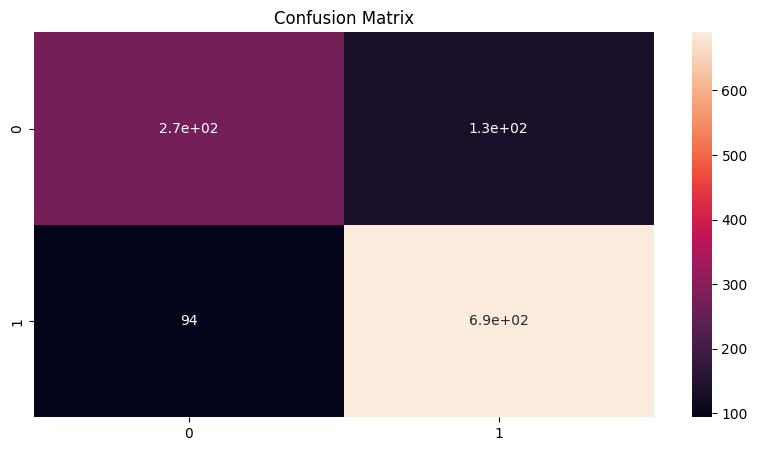

In [158]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix')
plt.show()

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       405
           1       0.84      0.88      0.86       784

    accuracy                           0.81      1189
   macro avg       0.79      0.77      0.78      1189
weighted avg       0.81      0.81      0.81      1189



In [160]:
print('Accuracy Score: ',round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy Score:  80.82 %


## **Future Prediction**

Selecting a random sample from the dataset.
Steps:

1. Selecting a random sample

In [170]:
pred_df = new_df.sample()

In [171]:
pred_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2782,7.1,0.2,0.31,6.85,0.053,32.0,211.0,0.99587,3.31,0.59,10.4,1


In [172]:
pred_df.shape

(1, 12)

2. Spliting X and y

In [173]:
y_new = pred_df['quality']

In [174]:
X_new = pred_df.drop(['quality'], axis=1)

3. Standardize X

In [175]:
X_new = ss.fit_transform(X_new)

4. Predict

In [176]:
y_pred_new = svc.predict(X_new)

In [180]:
print('Predicted Value: ',y_pred_new[0])

Predicted Value:  1




---



## **Explaination**

**Problem Statement:** We have a dataset of WineQuality that contains the features to determine the quality of good wine as it's columns.
WineQuality dataset has 12 coulmns/features:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

We need to develop a ML model using this dataset that predicts the quality of wine as "1" or "0", where "1" means "Good" and "0" means "Bad".


---


**Solution:**
The Steps for building a prediction model of wine quality are:
1. Importing Required library files like Pandas and Numpy
2. Importing the dataset from its source (Github)
3. Summarizing and Describing the data
4. Visualizing the quality feature of dataset using histplot and heatmap of Seaborn library
5. Preprocessing the dataset:
  *   Data Cleaning: Removing Null and NAN Values, Dropping Duplicate Values
  *   Data Transformation: Converting 3, 4, 5 as "0" and 6, 7, 8, 9 as "1"
6. Spliting the data as X and y
7. Standardizing the X value: Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual featues do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
8. Spliting the X and y into train and test data
9. Training a Support Vector Classification model of Support Vector Machine.
10. Testing the model with the test data
11. Evaluating the classification model using confusion_matrix, classification_report and accuracy_score.
12. Predicting Wine quality with the developed model using a sample data of the dataset.

**The trained SVC model has an accuracy score of : 80.82 %**


